<a href="https://colab.research.google.com/github/SreekarDugyala/Sreekar_INFO5731_Fall_2021/blob/main/In_class_exercise_05_11172022_Sreekar_Dugyala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/17/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [2]:
# Write your code here

import pandas as pd
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold

Traindataframe = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['abstract'])
Testdataframe = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['abstract'])

Traindataframe[['Sentiment','abstract']] = Traindataframe["abstract"].str.split(" ", 1, expand=True)
Testdataframe[['Sentiment','astract']] = Testdataframe["abstract"].str.split(" ", 1, expand=True)

In [3]:
print(Traindataframe.head())

                                            abstract Sentiment
0  a stirring , funny and finally transporting re...         1
1  apparently reassembled from the cutting-room f...         0
2  they presume their audience wo n't sit still f...         0
3  this is a visually stunning rumination on love...         1
4  jonathan parker 's bartleby should have been t...         1


In [4]:
print(Testdataframe.head())

                                            abstract Sentiment  \
0   0 no movement , no yuks , not much of anything .         0   
1  0 a gob of drivel so sickly sweet , even the e...         0   
2  0 gangs of new york is an unapologetic mess , ...         0   
3  0 we never really feel involved with the story...         0   
4          1 this is one of polanski 's best films .         1   

                                             astract  
0     no movement , no yuks , not much of anything .  
1  a gob of drivel so sickly sweet , even the eag...  
2  gangs of new york is an unapologetic mess , wh...  
3  we never really feel involved with the story ,...  
4            this is one of polanski 's best films .  


In [7]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
sw = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
WL= WordNetLemmatizer()

def cleaneddata(T):
  T ="".join([word.lower() for word in T if word not in string.punctuation])
  T = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", T)
  phrases = re.split('\W+',T)
  T = [WL.lemmatize(word) for word in phrases if word not in sw]
  return T

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(analyzer = cleaneddata)
tfidf1 = tf_idf.fit_transform(Traindataframe['abstract'])
tfidf1.shape

(6920, 13343)

In [9]:
tf_idataframe = pd.DataFrame(tfidf1.toarray())
tf_idataframe.columns=tf_idf.get_feature_names()
tf_idataframe.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,100minute,103minute,10course,10th,10thgrade,10year,10yearold,112minute,12,...,ziyi,zoe,zombie,zombieland,zone,zoning,zoom,zwick,zzzzzzzzz,élan
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.029784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.049596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
Test_tfidf = tf_idf.transform(Testdataframe['abstract'])
print(Test_tfidf.shape)

(1821, 13343)


In [12]:
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()

In [13]:
train1, test1, train2, test2 = train_test_split(tfidf1, Traindataframe['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [14]:
MNB1 = MNB.fit(train1,train2)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
FMNB = MNB1.predict(test1)
print('Acc_result %s' % accuracy_score(FMNB,test2))
print(classification_report(test2,FMNB))

Acc_result 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [16]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(MNB, test1, test2, cv=10)
print("MNB_given",result.mean())

MNB_given 0.7247054530288813


In [18]:
SVM1 = SVM.fit(train1,train2)
FSVM = SVM1.predict(test1)
print('Acc_result %s' % accuracy_score(FSVM,test2))
print(classification_report(test2,FSVM))

Acc_result 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [19]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(SVM, test1, test2, cv=10)
print("SVM_given",result.mean())

SVM_given 0.7348034615785632


In [20]:
KNN1 = KNN.fit(train1,train2)
FKNN = KNN1.predict(test1)
print('Acc_result %s' % accuracy_score(FKNN,test2))
print(classification_report(test2,FKNN))

Acc_result 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [21]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(KNN, test1, test2, cv=10)
print("KNN_given",result.mean())

KNN_given 0.6675737670732979


In [22]:
XGB1 = XGB.fit(train1,train2)
FXGB = XGB1.predict(test1)
result = cross_val_score(XGB, test1, test2, cv=10)
print('Acc_result %s' % accuracy_score(FXGB,test2))
print(classification_report(test2,FXGB))
print("XGB_given",result.mean())

Acc_result 0.6488439306358381
              precision    recall  f1-score   support

           0       0.76      0.41      0.53       671
           1       0.61      0.88      0.72       713

    accuracy                           0.65      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.65      0.63      1384

XGB_given 0.6198884370764259


In [23]:
result = cross_val_score(DT, test1, test2, cv=10)
print("DT_given",result.mean())

DT_given 0.6185121468042957


In [24]:
RF1 = RF.fit(train1,train2)
FRF = RF1.predict(test1)
result = cross_val_score(RF, test1, test2, cv=10)
print('Acc_result %s' % accuracy_score(FRF,test2))
print(classification_report(test2,FRF))
print("RF_given",result.mean())

Acc_result 0.7398843930635838
              precision    recall  f1-score   support

           0       0.79      0.64      0.70       671
           1       0.71      0.84      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384

RF_given 0.6798873944322802


In [25]:
Test_MNB = MNB1.predict(Test_tfidf)
print('Acc_result %s' % accuracy_score(Test_MNB,Testdataframe['Sentiment']))
print(classification_report(Test_MNB,Testdataframe['Sentiment']))

Acc_result 0.7940691927512356
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       729
           1       0.89      0.74      0.81      1092

    accuracy                           0.79      1821
   macro avg       0.79      0.81      0.79      1821
weighted avg       0.81      0.79      0.80      1821



In [26]:
Test_SVM = SVM1.predict(Test_tfidf)
print('Acc_result %s' % accuracy_score(Test_SVM,Testdataframe['Sentiment']))
print(classification_report(Test_SVM,Testdataframe['Sentiment']))

Acc_result 0.7869302580999451
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       838
           1       0.83      0.77      0.79       983

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821



(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [27]:
#Write your code here.

import pandas as pd
import gensim
Df=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from textblob import Word
nltk.download('wordnet')
from nltk.stem import PorterStemmer
st = PorterStemmer()
Df = Df[Df['Reviews'].notnull()]
df = Df
stop = stopwords.words('english')
Df['puncless'] = Df['Reviews'].str.replace('[^\w\s].#','')
Df['mstopwords'] =Df['puncless'].apply(lambda i: " ".join(i for i in i.split() if i not in stop))
Df['numbers']=Df['mstopwords'].str.replace('[0-9]','')
Df['lowest'] =Df['numbers'].apply(lambda i: " ".join(i.lower() for i in i.split()))

Df['stemming']=Df['lowest'].apply(lambda i: " ".join([st.stem(word) for word in i.split()]))
Df['freshdata'] = Df['stemming'].apply(lambda i: " ".join([Word(word).lemmatize() for word in i.split()]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


In [28]:
print(Df['freshdata'].head())

0    i feel lucki found use (phone u & use hard all...
1    nice phone, nice grade pantach revue. veri cle...
2                                            veri plea
3      it work good goe slow sometim good phone i love
4    great phone replac lost phone. the thing volum...
Name: freshdata, dtype: object


In [29]:
Df1=(df.sample(n=4000)).reset_index()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
tfidf_result = tf_idf.fit_transform(Df1['freshdata'].values)
print(tfidf_result.shape)

(4000, 6903)


In [32]:
from sklearn.cluster import KMeans
Mtf_idf = KMeans(n_clusters = 5, random_state=99)
Mtf_idf.fit(tfidf_result)

KMeans(n_clusters=5, random_state=99)

In [33]:
tfidf_labelling = Mtf_idf.labels_
tfidf_clustering=Mtf_idf.cluster_centers_

In [34]:
variables = tf_idf.get_feature_names()
variables[1:5]
Df1['tf_idf cluster labelling'] = tfidf_labelling
Df1.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,puncless,mstopwords,numbers,lowest,stemming,freshdata,tf_idf cluster labelling
0,157340,BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...,BLU,18.93,5,Excellent all well very perfect.,0.0,Excellent all well very perfect.,Excellent well perfect.,Excellent well perfect.,excellent well perfect.,excel well perfect.,excel well perfect.,0
1,176013,CNPGD All-in-1 Watch Cell Phone & Smart Watch ...,NaN,49.99,2,It's used and there is some privete informatio...,0.0,It's used and there is some privete informatio...,It's used privete information it. I can't reco...,It's used privete information it. I can't reco...,it's used privete information it. i can't reco...,it' use privet inform it. i can't recov pin,it' use privet inform it. i can't recov pin,2
2,280113,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,This box is just amazing. It turned a battered...,0.0,This box is just amazing. It turned a battered...,This box amazing. It turned battered scratched...,This box amazing. It turned battered scratched...,this box amazing. it turned battered scratched...,thi box amazing. it turn batter scratch tablet...,thi box amazing. it turn batter scratch tablet...,2
3,98060,Blackberry Q10 SQN100-1 16GB 4G LTE Unlocked G...,BlackBerry,149.95,5,Phone arrived in perfect condition in sealed o...,5.0,Phone arrived in perfect condition in sealed o...,Phone arrived perfect condition sealed origina...,Phone arrived perfect condition sealed origina...,phone arrived perfect condition sealed origina...,phone arriv perfect condit seal origin packag ...,phone arriv perfect condit seal origin packag ...,2
4,70952,"Apple iPhone 6S Plus Unlocked Smartphone, 32 G...",Apple,749.99,5,i love it!,1.0,i love it!,love it!,love it!,love it!,love it!,love it!,4


In [35]:
Df1.groupby(['tf_idf cluster labelling'])['freshdata'].count()

tf_idf cluster labelling
0     132
1     175
2    3332
3      73
4     288
Name: freshdata, dtype: int64

In [36]:
centers = Mtf_idf.cluster_centers_.argsort()[:, ::-1]
for a in range(1,5):
    print("Cluster %d:" % a, end='')
    for ind in centers[a, :7]:
        print(' %s' % variables[ind], end='')
        print()

Cluster 1: good
 veri
 phone
 product
 it
 work
 price
Cluster 2: phone
 it
 work
 good
 the
 use
 great
Cluster 3: excelent
 producto
 recomendado
 gracia
 telefono
 alright
 shown
Cluster 4: great
 love
 phone
 work
 it
 price
 product


In [37]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import gensim
a=0
list=[]
for b in Df1['freshdata'].values:
    list.append(b.split())
wmword = gensim.models.Word2Vec(list,size=100, workers=4)
import numpy as np
vectors = [];
for b in list:
    vector1 = np.zeros(100)
    count = 0;
    for w in b:
        try:
            vector2 = wmword.wv[w]
            vector1 += vector2
            count += 1
        except:
            pass
    vector1 /= count
    vectors.append(vector1)
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)
vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


(4000, 100)

In [39]:
points = 2 * 100
def lower_bound(num, reach): 
    l, u = 0, len(num) - 1
    while l <= u: 
        c = int(l + (u - l) / 2)
        if num[c] >= reach:
            u = c - 1
        else:
            l = c + 1
    return l

def computing (i, text): 
    distances = []
    for v in text:
        distance = np.sum((i - v) **2 ) 
        if(len(distances) == 200 and distances[199] > distance): 
            l = int(lower_bound(distances, distance))
            if l < 200 and l >= 0 and distances[l] > distance:
                distances[l] = distance
        else:
            distances.append(distance)
            distances.sort()
    
    return distances[199]

In [40]:
neighbour = []
for v in vectors[:500]:
    neighbour.append(computing(v, vectors[:500]) )
neighbour.sort()

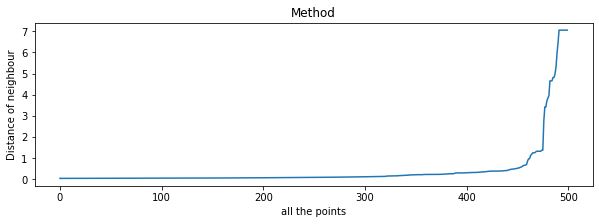

In [41]:
plt.figure(figsize=(10,3))
plt.title("Method")
plt.plot([i for i in range(len(neighbour))], neighbour)
plt.xlabel("all the points")
plt.ylabel("Distance of neighbour")
plt.show()

In [42]:
design = DBSCAN(eps = 8, min_samples = points, n_jobs=-2)
design.fit(vectors)
Df1['WMword design'] = design.labels_
Df1.head(4)

,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,puncless,mstopwords,numbers,lowest,stemming,freshdata,tf_idf cluster labelling,WMword design
0,157340,BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...,BLU,18.93,5,Excellent all well very perfect.,0.0,Excellent all well very perfect.,Excellent well perfect.,Excellent well perfect.,excellent well perfect.,excel well perfect.,excel well perfect.,0,0
1,176013,CNPGD All-in-1 Watch Cell Phone & Smart Watch ...,NaN,49.99,2,It's used and there is some privete informatio...,0.0,It's used and there is some privete informatio...,It's used privete information it. I can't reco...,It's used privete information it. I can't reco...,it's used privete information it. i can't reco...,it' use privet inform it. i can't recov pin,it' use privet inform it. i can't recov pin,2,0
2,280113,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,This box is just amazing. It turned a battered...,0.0,This box is just amazing. It turned a battered...,This box amazing. It turned battered scratched...,This box amazing. It turned battered scratched...,this box amazing. it turned battered scratched...,thi box amazing. it turn batter scratch tablet...,thi box amazing. it turn batter scratch tablet...,2,0
3,98060,Blackberry Q10 SQN100-1 16GB 4G LTE Unlocked G...,BlackBerry,149.95,5,Phone arrived in perfect condition in sealed o...,5.0,Phone arrived in perfect condition in sealed o...,Phone arrived perfect condition sealed origina...,Phone arrived perfect condition sealed origina...,phone arrived perfect condition sealed origina...,phone arriv perfect condit seal origin packag ...,phone arriv perfect condit seal origin packag ...,2,0


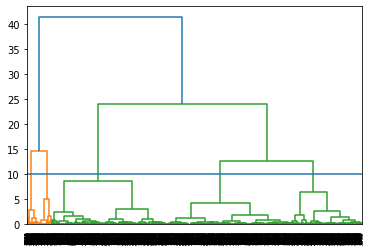

In [43]:
import scipy
from scipy.cluster import hierarchy
Dendogram = hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=10)

In [44]:
from sklearn.cluster import AgglomerativeClustering

clustering_analysis = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
Agg = clustering_analysis.fit_predict(vectors)
Df1['WMword cluster'] = clustering_analysis.labels_
Df1.head(6)
Df1.groupby(['WMword cluster'])['freshdata'].count()

WMword cluster
0     134
1    1494
2     751
3     169
4     635
5     612
6     205
Name: freshdata, dtype: int64

In [45]:
for a in range(6):
    print("sentence", a) #reviews assigned to cluster
    print(Df1.iloc[Df1.groupby(['WMword cluster']).groups[a][0]]['freshdata'])
    print(Df1.iloc[Df1.groupby(['WMword cluster']).groups[a][1]]['freshdata'])

sentence 0
ye
exelent producto
sentence 1
excel well perfect.
it' use privet inform it. i can't recov pin
sentence 2
phone sound much tinni previou iphones. otherwis everyth el great.
phone not work att associ complet differ phone. i order iphon s gb gold, receiv platinum also imi list blue gb c. thi not used, basic bought overpr ipod.
sentence 3
a advertised, arriv quickly. thanks.
ok
sentence 4
love it!
bought altern replac moto g st generation. the size slightli longer moto, width moto. i want like phone edg edg screen g. unfortunately, i return follow reasons. first, got hot back side i set up. second, sound level ear piec low comparison moto g. possibl defective? probabl extern speaker volum also much lower moto g. lastly, i surpris find g much faster moto g g data downloads. mayb i expect much i think worth $ upgrad moto g.
sentence 5
best phone ever look qualiti perform speed camera featur phone phenomen love i upgrad s
thi phone awsome.


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

K-means clustering is an algorithm that categorizes attributes and features into k groups. In this case, K is a positive integer, and the sum of the squares of the distance is grouped by minimization and the centroid cluster. This clustering is the most commonly used in the industry today, and it computes faster than any other clustering technique, but it does not produce the same results every time because the resulting clusters are determined by the initial random assignments. K-means simply reduces the variance in a cluster known as SSE (Sum of squared errors).

DBscan is a density based non-parametric clustering algorithm. The set of points are grouped together which are closely packed marking as outliers in low-density region.

Hierarchical clustering is an unsupervised technique that gives successive clustering based on previously established clusters. Agglomerative is the on of the hierarchical clustering alogorithm which begins each one into seperate clusters and then merges into larger one. In this clustering method, the elements are grouped based on the distance between the each cluster